## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Checking the number of mice in the DataFrame.
mice_num = combined_data["Mouse ID"].count()
mice_num

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_duplicates

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data["Mouse ID"]=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(subset=['Mouse ID'])
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_number = clean_df['Mouse ID'].count()
mouse_number


249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
drug_group = combined_data.groupby(['Drug Regimen'])
drug_group

tumor_mean = drug_group['Tumor Volume (mm3)'].mean()
tumor_median = drug_group['Tumor Volume (mm3)'].median()
tumor_variance = drug_group['Tumor Volume (mm3)'].var()
tumor_std = drug_group['Tumor Volume (mm3)'].std()
tumor_sem = drug_group['Tumor Volume (mm3)'].sem()

tumor_mean
tumor_median
tumor_variance
tumor_std
tumor_sem



Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

tumor_stats = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_variance, 'Standard Deviation': tumor_std, 'SEM': tumor_sem  })
tumor_stats 

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

<function matplotlib.pyplot.show(close=None, block=None)>

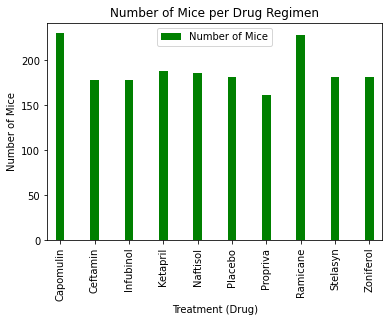

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_num = combined_data.groupby(['Drug Regimen']).count()['Mouse ID']

bar_df = pd.DataFrame({"Number of Mice": mice_num})
bar_df.plot(kind="bar", width =.25, color ="green")
plt.xlabel("Treatment (Drug)")
plt.ylabel("Number of Mice")
plt.title('Number of Mice per Drug Regimen')
plt.show

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

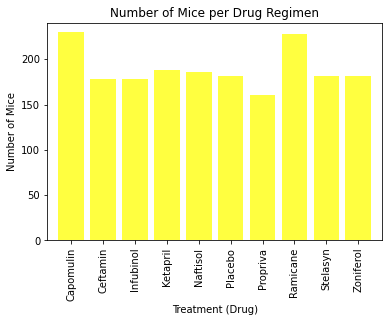

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

mice_num_list = combined_data.groupby(['Drug Regimen']).count()['Mouse ID'].tolist()
mice_num_list

x_axis = np.arange(len(mice_num))

plt.bar(x_axis, mice_num_list, color='yellow', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_num_list)+10)
plt.xlabel("Treatment (Drug)")
plt.ylabel("Number of Mice")
plt.title('Number of Mice per Drug Regimen')


## Pie Plots

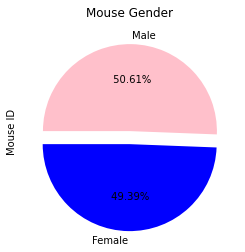

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender_count = combined_data.groupby(['Sex']).count()['Mouse ID']
mouse_gender_count

gender_percentage = mouse_gender_count / mice_num 
gender_percentage 

gender_demographics_df = pd.DataFrame({"Total Count": mouse_gender_count,
                                       "Percentage Count": gender_percentage})
gender_demographics_df["Percentage Count"] = gender_demographics_df["Percentage Count"].map("{: .2%}".format)
gender_demographics_df


mouse_gender_count.plot(kind = "pie",
             title = "Mouse Gender",
             colors = ["blue","pink"],
             shadow = False,
             autopct="% .2f%%",
            startangle =180,
              explode = (0.15,0)
             )
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

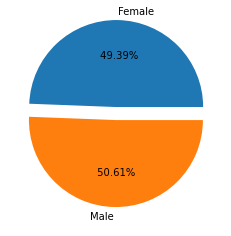

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_gender_count, labels=["Female", "Male"], autopct="% .2f%%",shadow = False, explode = (0.15,0))
plt.show

## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
box_plot = [tumor_campulin , tumor_ramicane, tumor_infubinol, tumor_ceftamin]
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Campomulin

drug_capomulin = combined_data.loc[combined_data["Drug Regimen"]== "Capomulin"]
drug_capomulin_f = drug_capomulin.loc[drug_capomulin["Timepoint"]== 40]

tumor_campulin = drug_capomulin_f["Tumor Volume (mm3)"]
quartile = drug_capomulin_f["Tumor Volume (mm3)"].quantile(q=[0.25, 0.50, 0.75])
lowerq = quartile[0.25]
upperq = quartile [0.75]
median = quartile[0.50]
iqr = upperq - lowerq
upper_bound = lowerq -(iqr * 1.5)
lower_bound = upperq + (iqr * 1.5)
print(f"The upper quartile of Capomulin Drug Regimen is {upperq}")
print(f"The lower quartile of Capomulin Drug Regimen is {lowerq}")
print(f"The median of Capomulin Drug Regimen is {median}")
print(f"The interquartile range of Capomulin Drug Regimen is {iqr}")
print(f"Values above {upper_bound} and values lower {lower_bound} are outliers of Capomulin Drug Regimen")

#Ramicane

drug_ramicane = combined_data.loc[combined_data["Drug Regimen"]== "Ramicane"]
drug_ramicane_f = drug_ramicane.loc[drug_ramicane["Timepoint"]== 45]

tumor_ramicane = drug_ramicane_f["Tumor Volume (mm3)"]
quartile = drug_ramicane_f["Tumor Volume (mm3)"].quantile(q=[0.25, 0.50, 0.75])
lowerq = quartile[0.25]
upperq = quartile [0.75]
median = quartile[0.50]
iqr = upperq - lowerq
upper_bound = lowerq -(iqr * 1.5)
lower_bound = upperq + (iqr * 1.5)
print(f"The upper quartile of Ramicane Drug Regimen is {upperq}")
print(f"The lower quartile of Ramicane Drug Regimen is {lowerq}")
print(f"The median of Ramicane Drug Regimen is {median}")
print(f"The interquartile range of Ramicane Drug Regimen is {iqr}")
print(f"Values above {upper_bound} and values lower {lower_bound} are outliers of Ramicane Drug Regimen")

#Infubinol

drug_infubinol = combined_data.loc[combined_data["Drug Regimen"]== "Infubinol"]
drug_infubinol_f = drug_infubinol.loc[drug_infubinol["Timepoint"]==45]

tumor_infubinol = drug_infubinol_f["Tumor Volume (mm3)"]
quartile = drug_infubinol_f["Tumor Volume (mm3)"].quantile(q=[0.25, 0.50, 0.75])
lowerq = quartile[0.25]
upperq = quartile [0.75]
median = quartile[0.50]
iqr = upperq - lowerq
upper_bound = lowerq -(iqr * 1.5)
lower_bound = upperq + (iqr * 1.5)
print(f"The upper quartile of Infubinol Drug Regimen is {upperq}")
print(f"The lower quartile of Infubinol Drug Regimen is {lowerq}")
print(f"The median of Infubinol Drug Regimen is {median}")
print(f"The interquartile range of Infubinol Drug Regimen is {iqr}")
print(f"Values above {upper_bound} and values lower {lower_bound} are outliers of Infubinol Drug Regimen")

#Ceftamin

drug_ceftamin = combined_data.loc[combined_data["Drug Regimen"]== "Ceftamin"]
drug_ceftamin_f = drug_ceftamin.loc[drug_ceftamin["Timepoint"]== 45]

tumor_ceftamin = drug_ceftamin["Tumor Volume (mm3)"]
quartile = drug_ceftamin_f["Tumor Volume (mm3)"].quantile(q=[0.25, 0.50, 0.75])
lowerq = quartile[0.25]
upperq = quartile [0.75]
median = quartile[0.50]
iqr = upperq - lowerq
upper_bound = lowerq -(iqr * 1.5)
lower_bound = upperq + (iqr * 1.5)





The upper quartile of Capomulin Drug Regimen is 40.77081259
The lower quartile of Capomulin Drug Regimen is 32.94761484
The median of Capomulin Drug Regimen is 36.84389799
The interquartile range of Capomulin Drug Regimen is 7.8231977499999985
Values above 21.212818215000002 and values lower 52.50560921499999 are outliers of Capomulin Drug Regimen
The upper quartile of Ramicane Drug Regimen is 38.5083053075
The lower quartile of Ramicane Drug Regimen is 30.981175225
The median of Ramicane Drug Regimen is 34.848627300000004
The interquartile range of Ramicane Drug Regimen is 7.527130082500001
Values above 19.69048010125 and values lower 49.79900043125001 are outliers of Ramicane Drug Regimen
The upper quartile of Infubinol Drug Regimen is 67.68556862
The lower quartile of Infubinol Drug Regimen is 62.75445141
The median of Infubinol Drug Regimen is 66.08306589
The interquartile range of Infubinol Drug Regimen is 4.9311172099999965
Values above 55.35777559500001 and values lower 75.08224

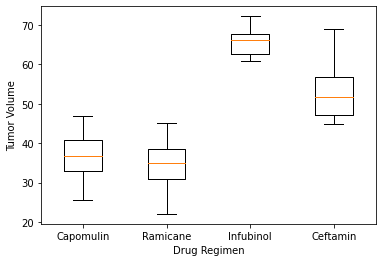

In [101]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(box_plot, labels =treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

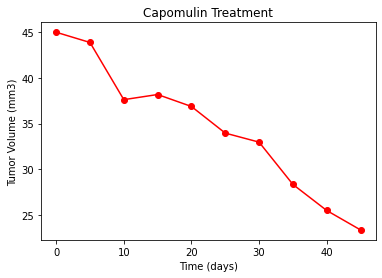

In [102]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

    
combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin'].head(10)

mouse = combined_data.loc[combined_data['Mouse ID'] == 's185']


#Plot line chart
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker='o', color = 'r')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment")

# Display plot
plt.show()

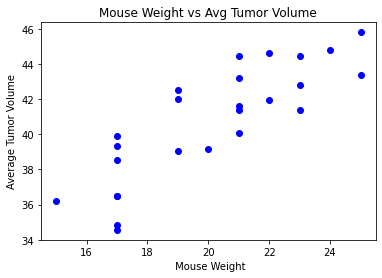

In [121]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


avg_vol_df = drug_capomulin.groupby(["Mouse ID", "Weight (g)"]).mean()["Tumor Volume (mm3)"].reset_index()


plt.scatter(x= avg_vol_df["Weight (g)"],
           y=avg_vol_df["Tumor Volume (mm3)"],
           color="b")
plt.title("Mouse Weight vs Avg Tumor Volume")
plt.xlabel(" Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()




## Correlation and Regression

In [124]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(avg_vol_df["Weight (g)"], avg_vol_df["Tumor Volume (mm3)"])[0], 2)
correlation


0.84